# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

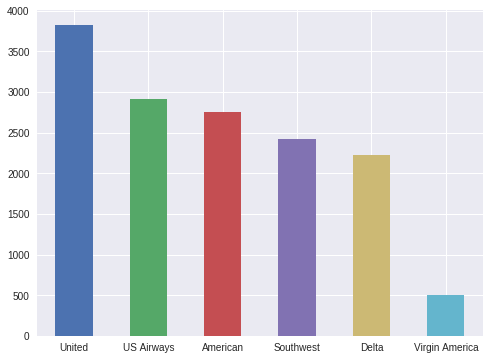

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

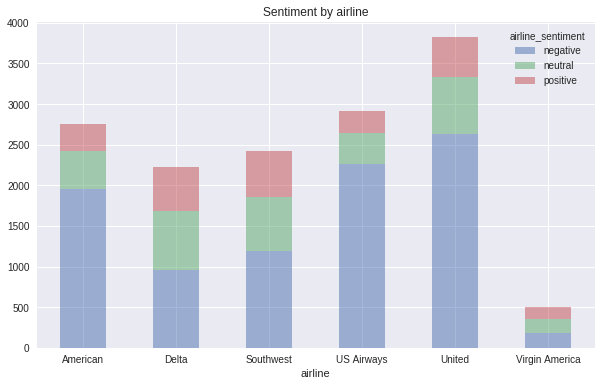

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [0]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [0]:
vect = CountVectorizer() 
X_dtm = vect.fit_transform(X)

In [0]:
temp=X_dtm.todense()

In [11]:
vect.vocabulary_

{'virginamerica': 14273,
 'what': 14551,
 'dhepburn': 4804,
 'said': 11646,
 'plus': 10438,
 'you': 14944,
 've': 14193,
 'added': 1965,
 'commercials': 4030,
 'to': 13326,
 'the': 13120,
 'experience': 5665,
 'tacky': 12925,
 'didn': 4821,
 'today': 13330,
 'must': 9234,
 'mean': 8837,
 'need': 9375,
 'take': 12941,
 'another': 2331,
 'trip': 13509,
 'it': 7685,
 'really': 11020,
 'aggressive': 2054,
 'blast': 3070,
 'obnoxious': 9726,
 'entertainment': 5455,
 'in': 7381,
 'your': 14953,
 'guests': 6733,
 'faces': 5740,
 'amp': 2263,
 'they': 13167,
 'have': 6868,
 'little': 8392,
 'recourse': 11078,
 'and': 2281,
 'big': 3007,
 'bad': 2746,
 'thing': 13176,
 'about': 1862,
 'seriously': 11914,
 'would': 14778,
 'pay': 10175,
 '30': 761,
 'flight': 6004,
 'for': 6157,
 'seats': 11832,
 'that': 13115,
 'this': 13188,
 'playing': 10403,
 'only': 9836,
 'flying': 6101,
 'va': 14145,
 'yes': 14922,
 'nearly': 9371,
 'every': 5572,
 'time': 13270,
 'fly': 6086,
 'vx': 14345,
 'ear': 5238,


In [12]:
X_dtm.shape

(14640, 15051)

In [13]:
print(vect.get_feature_names()[-150:-100])

['yayayay', 'ybmbgs0dhn', 'ybv0xaowkv', 'yc7v2s0iod', 'yccitaep3s', 'yco9dikpt9', 'yday', 'yea', 'yeah', 'year', 'yearly', 'years', 'yeehaw', 'yeg', 'yell', 'yelled', 'yelling', 'yellow', 'yeniettelswood', 'yep', 'yer', 'yes', 'yeseniahernandez', 'yessir', 'yest', 'yesterday', 'yet', 'yf9nhmwyff', 'yh1kzkyzrr', 'yhz', 'yi4wguk5tr', 'yield', 'yikes', 'yiwlhqhzgp', 'ymftw1uyhr', 'ymmh9k4cbr', 'ync2zut4zz', 'yo', 'yoga', 'yogurt', 'yokkhhqcmp', 'york', 'yorkshire2002', 'you', 'youareonyourown', 'youcandobetter', 'youcouldntmakethis', 'youd', 'youdidit', 'youknowyouwantto']


In [0]:
rf=RandomForestClassifier()

In [15]:
print(pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

count    10.000000
mean      0.705322
std       0.034966
min       0.618852
25%       0.698322
50%       0.715946
75%       0.723502
max       0.743852
dtype: float64


# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [0]:

def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    rf = RandomForestClassifier()
    print(pd.Series(cross_val_score(rf, X_dtm, y, cv=10)).describe())

In [17]:
vect = CountVectorizer(stop_words='english') 
tokenize_test(vect)

Features:  14770


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

count    10.000000
mean      0.694806
std       0.040793
min       0.612705
25%       0.675088
50%       0.703010
75%       0.714530
max       0.765027
dtype: float64


# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [18]:
vect = CountVectorizer(ngram_range=(1, 2),min_df=2)
tokenize_test(vect)

Features:  31146


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

count    10.000000
mean      0.715299
std       0.020993
min       0.689420
25%       0.697148
50%       0.715943
75%       0.727677
max       0.754781
dtype: float64


In [19]:
vect = CountVectorizer(ngram_range=(1, 2),min_df=2,stop_words='english')
tokenize_test(vect)

Features:  18448


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

count    10.000000
mean      0.701842
std       0.043905
min       0.608607
25%       0.693187
50%       0.704034
75%       0.713481
max       0.782787
dtype: float64


# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [20]:
vect = CountVectorizer()  
tf = pd.DataFrame(X_dtm.toarray(), columns=vect.get_feature_names()) 
tf

NotFittedError: ignored

In [0]:
vect = TfidfVectorizer()
X_tfidf=vect.fit_transform(X)
pd.DataFrame(, columns=vect.get_feature_names())

In [0]:
X_new=pd.DataFrame(X)

In [0]:
df=X_new[1:]

In [0]:
df